# Abschlussprojekt

Ihr bekommt einen realistischen Datensatz mit über 30.000 Stellenausschreibungen aus dem Bereich Datenanalyse, Data Science und Machine Learning.
<br>
<br>
Dieser Datensatz befindet sich in der `Job_Data.csv` Datei und enthält folgende Spaltennamen:
- `job_title_short`: Kurzform der Berufsbezeichnung
- `job_location`: Stadt und Bundesstaat
- `job_schedule_type`: Vollzeit / Teilzeit
- `job_work_from_home`: Homeoffice möglich? (True/False)
- `salary_rate`: "year" oder "hour" – Gehaltsangabe pro Jahr oder Stunde
- `salary_year_avg`: Durchschnittliches Jahresgehalt (sofern angegeben)
- `job_no_degree_mention`: Wird ein Abschluss verlangt? (True/False)
- `job_skills`: Liste von geforderten Skills (z. B. Python, SQL, TensorFlow)
- `company_name`: Arbeitgeber
- `job_posted_date`: Wann wurde der Job veröffentlicht?

Analysiert diesen Datensatz mithilfe von Python, Pandas und Matplotlib und erstellt eine explorative Datenanalyse (EDA). Ziel ist es, interessante Zusammenhänge, Muster und Besonderheiten zu entdecken – und diese in einer kurzen Präsentation und einem Bericht anschaulich darzustellen.

## Leitfaden

### Ziel

Untersuche Tech-Jobangebote aus verschiedenen Ländern, um herauszufinden:
- Welche Skills gefragt sind
- Welche Rollen am besten bezahlt werden
- Wie sich Arbeitsmodelle unterscheiden
- Wie sich Gehälter regional verteilen
- Und vieles mehr!

### Datenvorbereitung (Pandas)

**Aufgabe 1: Erste Datenchecks:**
- Zeige die ersten 10 Zeilen
- Untersuche Datentypen
- Untersuche fehlende Werte
- Prüfe eindeutige Werte in job_country, job_title_short, salary_rate

**Aufgabe 2: Datentypen bereinigen**
- Konvertiere job_posted_date zu datetime
- Ersetze Kommas in salary_hour_avg & wandle in float
- Konvertiere salary_year_avg zu float

**Aufgabe 3: Neue Features**
- Erstelle ein Feature: is_remote aus job_work_from_home
- Erstelle ein Feature: salary_bin (z. B. low/mid/high basierend auf salary_year_avg)
- Extrahiere Jahr & Monat aus job_posted_date

### Analysen

**Aufgabe 4: Übersichtliche Visualisierungen**
- Top 10 häufigste Jobtitel
- Top 10 meistgefragte Skills (Tipp: job_skills als Liste aufsplitten)
- Gehalt nach Jobtitel (Barplot)
- Anzahl Remote-Jobs nach Jahr/Monat
- Gehalt nach Land oder US-Bundesstaat

**Aufgabe 5: Zeitreihenanalyse**
- Wie hat sich die Anzahl an Jobpostings über Zeit entwickelt?
- Gibt es saisonale Muster?

**Aufgabe 6: Vergleich Full-time vs. Part-time**
- Durchschnittsgehalt
- Anteil Remote
- Top Skills

### Vertiefung: Gehaltsanalyse

**Aufgabe 7: Gehaltstrends**
- Welche Jobtitel haben den höchsten Jahresdurchschnitt?
- Welche Skills sind mit hohen Gehältern verbunden?
- Wie unterscheiden sich salary_hour_avg und salary_year_avg?

**Aufgabe 8: Länder-/Standortvergleich**
- Vergleiche Gehaltsniveaus zwischen USA, Sudan, etc.
- Durchschnittliche Gehälter nach Bundesstaat (z. B. extrahiert aus job_location)


### Explorative Aufgaben

**Aufgabe 9: Text-Parsing und Feature Engineering**
- Zähle Vorkommen einzelner Skills
- Cluster ähnliche Rollen (z. B. alle mit "Data Scientist")
- Extrahiere State aus US-Adressen

**Aufgabe 10: Interaktive Visualisierung (optional)**
- Verwende plotly oder Dash für interaktive Charts (falls du erweitern willst)

### Bonusideen für Extra-Punkte

- Heatmap der Gehälter auf einer US-Karte
- Skill Co-Occurrence Matrix: Welche Skills tauchen oft gemeinsam auf?
- Jobmarkt-Index: Definiere eine eigene Kennzahl für „Attraktivität“ eines Jobs




**Aufgabe 1: Erste Datenchecks:**
- Zeige die ersten 10 Zeilen
- Untersuche Datentypen
- Untersuche fehlende Werte
- Prüfe eindeutige Werte in job_country, job_title_short, salary_rate

In [3]:
import pandas as pd
# Datei laden
job_data = pd.read_csv('Job_Data.csv',sep=";")

# Erste 10 Zeilen anzeigen
first_10_rows = job_data.head(10)


job_data.head(10)










,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",via ZipRecruiter,Full-time,False,Sudan,2023-04-24 09:51:15,False,True,Sudan,year,128050,NaN,Cox Communications,"['sql', 'python', 'aws', 'pyspark', 'tableau',..."
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",via Indeed,Full-time,False,Georgia,2023-03-13 12:51:23,True,True,United States,year,140000,NaN,Worldgate LLC,"['sql', 'nosql', 'java', 'python', 'kafka', 's..."
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",via ZipRecruiter,Full-time,False,"New York, United States",2023-07-05 07:03:38,True,False,United States,year,156000,NaN,National Technical Information Service,NaN
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13 16:05:41,False,True,United States,year,140000,NaN,Bosch Group,"['pytorch', 'tensorflow']"
4,Data Scientist,"Data Scientist, AWS","Irving, TX",via Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15 06:02:51,False,False,United States,hour,NaN,"39,79500198","Presidio, Inc.","['python', 'r', 'sql', 'c', 'aws', 'gcp', 'big..."
5,Data Engineer,Data Engineer,"Tysons, VA",via Snagajob,Full-time and Part-time,False,Sudan,2023-10-10 06:19:50,False,False,Sudan,hour,NaN,"61,15999603","LMI Consulting, LLC","['python', 'java', 'sql', 'snowflake', 'pyspar..."
6,Data Engineer,Sr. Data Engineer (remote),Anywhere,via Indeed,Full-time,True,"Texas, United States",2023-10-26 19:07:59,False,True,United States,year,135000,NaN,MultiPlan Inc.,"['python', 'java', 'sql', 'nosql', 'mongodb', ..."
7,Senior Data Engineer,Senior Data Engineer - Cloud Infrastructure an...,"Coplay, PA",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-09-08 22:31:10,False,False,United States,year,120000,NaN,Sports Info Solutions,"['python', 'rust', 'c++', 'java', 'aws', 'gcp'..."
8,Senior Data Analyst,Senior Data Analyst Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-09-07 08:01:13,True,False,United States,year,170000,NaN,Arsenault,"['sql', 'nosql', 'python', 'tableau']"
9,Data Scientist,Data Scientist - TikTok Ads,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-02 15:01:03,False,True,United States,year,224500,NaN,TikTok,"['r', 'python', 'matlab', 'sql']"


In [4]:
# Datentypen untersuchen
data_types = job_data.dtypes
data_types

job_title_short          object
job_title                object
job_location             object
job_via                  object
job_schedule_type        object
job_work_from_home         bool
search_location          object
job_posted_date          object
job_no_degree_mention      bool
job_health_insurance       bool
job_country              object
salary_rate              object
salary_year_avg          object
salary_hour_avg          object
company_name             object
job_skills               object
dtype: object

In [5]:
# Fehlende Werte untersuchen
missing_values = job_data.isnull().sum()
missing_values

job_title_short              0
job_title                    0
job_location               355
job_via                     10
job_schedule_type          141
job_work_from_home           0
search_location              0
job_posted_date              0
job_no_degree_mention        0
job_health_insurance         0
job_country                  0
salary_rate                  0
salary_year_avg          10636
salary_hour_avg          22036
company_name                 0
job_skills                3187
dtype: int64

In [6]:
# ersetze fehlende werte durch 0
job_data.fillna(0, inplace=True)
job_data.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",via ZipRecruiter,Full-time,False,Sudan,2023-04-24 09:51:15,False,True,Sudan,year,128050,0,Cox Communications,"['sql', 'python', 'aws', 'pyspark', 'tableau',..."
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",via Indeed,Full-time,False,Georgia,2023-03-13 12:51:23,True,True,United States,year,140000,0,Worldgate LLC,"['sql', 'nosql', 'java', 'python', 'kafka', 's..."
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",via ZipRecruiter,Full-time,False,"New York, United States",2023-07-05 07:03:38,True,False,United States,year,156000,0,National Technical Information Service,0
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13 16:05:41,False,True,United States,year,140000,0,Bosch Group,"['pytorch', 'tensorflow']"
4,Data Scientist,"Data Scientist, AWS","Irving, TX",via Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15 06:02:51,False,False,United States,hour,0,"39,79500198","Presidio, Inc.","['python', 'r', 'sql', 'c', 'aws', 'gcp', 'big..."


In [7]:

# Eindeutige Werte in den geforderten Spalten prüfen
unique_values = {
    "job_country": job_data["job_country"].unique(),
    "job_title_short": job_data["job_title_short"].unique(),
    "salary_rate": job_data["salary_rate"].unique()
}
unique_values

{'job_country': array(['Sudan', 'United States', 'France', 'Mexico', 'Canada', 'Croatia',
        'Germany', 'Spain', 'India', 'Estonia', 'Greece', 'Brazil',
        'Cyprus', 'Indonesia', 'Jamaica', 'Netherlands', 'Hong Kong',
        'Finland', 'Portugal', 'United Kingdom', 'Australia',
        'Philippines', 'Luxembourg', 'Israel', 'Bulgaria', 'Belgium',
        'Serbia', 'Ukraine', 'Singapore', 'Algeria', 'Argentina',
        'Hungary', 'Poland', 'Ghana', 'Norway', 'Costa Rica', 'Taiwan',
        'Colombia', 'Sweden', 'Romania', 'Japan', 'South Korea',
        'Switzerland', 'South Africa', 'Malaysia', 'Egypt', 'Turkey',
        'Ireland', 'Italy', 'Kenya', 'Thailand', 'Slovakia', 'Nigeria',
        'Austria', 'Bangladesh', 'Cambodia', 'Vietnam', 'Czechia',
        'Congo, Democratic Republic of the', 'Kazakhstan', 'Chile',
        'New Zealand', 'Cameroon', 'Puerto Rico', 'Pakistan', 'Sri Lanka',
        'Albania', 'Zimbabwe', 'United Arab Emirates',
        'U.S. Virgin Islands',

**Aufgabe 2: Datentypen bereinigen**
- Konvertiere job_posted_date zu datetime
- Ersetze Kommas in salary_hour_avg & wandle in float
- Konvertiere salary_year_avg zu float

In [8]:
import pandas as pd

# lade CSV 
job_data = pd.read_csv('Job_Data.csv', delimiter=';')

# konventiere job_posted_date to datetime
job_data['job_posted_date'] = pd.to_datetime(job_data['job_posted_date'])

# enferne kommas in salary_hour_avg und konventieren in float
job_data['salary_hour_avg'] = job_data['salary_hour_avg'].str.replace(',', '.').astype(float)

# in  float konventieren
job_data['salary_year_avg'] = job_data['salary_year_avg'].str.replace(',', '.').astype(float)


# Speichern der bereinigten csv um besser weiter zu analysieren
job_data.to_csv('Job_Data_Cleaned.csv', index=False)

print("Data cleaning completed and saved to Job_Data_Cleaned.csv")

Data cleaning completed and saved to Job_Data_Cleaned.csv


**Aufgabe 3: Neue Features**
- Erstelle ein Feature: is_remote aus job_work_from_home
- Erstelle ein Feature: salary_bin (z. B. low/mid/high basierend auf salary_year_avg)
- Extrahiere Jahr & Monat aus job_posted_date

In [9]:
job_data1 = pd.read_csv('Job_Data_Cleaned.csv')

# ersetze fehlende werte durch 0
job_data1.fillna(0, inplace=True)

# konventiere job_posted_date to datetime
job_data1["job_posted_date"] = pd.to_datetime(job_data1["job_posted_date"])

# erstelle ein feature: is_remote from job_work_from_home
job_data1["is_remote"] = job_data1["job_work_from_home"].apply(lambda x: 1 if x else 0)

# erstelle ein feature: salary_bin in salary_year_avg
def categorize_salary(salary):
    if salary < 100000:
        return 'low'
    elif 100000 <= salary < 150000:
        return 'mid'
    else:
        return 'high'

job_data1["salary_bin"] = job_data1["salary_year_avg"].apply(categorize_salary)

# Extract year and month from job_posted_date
job_data1["job_posted_year"] = job_data1["job_posted_date"].dt.year
job_data1["job_posted_month"] = job_data1["job_posted_date"].dt.month
job_data1.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,is_remote,salary_bin,job_posted_year,job_posted_month
0,Senior Data Scientist,Senior Data Scientist Data and Analytics Perfo...,"Bennington, NE",via ZipRecruiter,Full-time,False,Sudan,2023-04-24 09:51:15,False,True,Sudan,year,128050.0,0.000000,Cox Communications,"['sql', 'python', 'aws', 'pyspark', 'tableau',...",0,mid,2023,4
1,Data Engineer,Data Engineer - MA,"Mesa, AZ",via Indeed,Full-time,False,Georgia,2023-03-13 12:51:23,True,True,United States,year,140000.0,0.000000,Worldgate LLC,"['sql', 'nosql', 'java', 'python', 'kafka', 's...",0,mid,2023,3
2,Senior Data Analyst,Supervisory Information Technology Specialist ...,"Alexandria, VA",via ZipRecruiter,Full-time,False,"New York, United States",2023-07-05 07:03:38,True,False,United States,year,156000.0,0.000000,National Technical Information Service,0,0,high,2023,7
3,Machine Learning Engineer,Machine Learning Research Scientist,"Pittsburgh, PA",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-13 16:05:41,False,True,United States,year,140000.0,0.000000,Bosch Group,"['pytorch', 'tensorflow']",0,mid,2023,4
4,Data Scientist,"Data Scientist, AWS","Irving, TX",via Snagajob,Full-time and Part-time,False,"Texas, United States",2023-10-15 06:02:51,False,False,United States,hour,0.0,39.795002,"Presidio, Inc.","['python', 'r', 'sql', 'c', 'aws', 'gcp', 'big...",0,low,2023,10
5,Data Engineer,Data Engineer,"Tysons, VA",via Snagajob,Full-time and Part-time,False,Sudan,2023-10-10 06:19:50,False,False,Sudan,hour,0.0,61.159996,"LMI Consulting, LLC","['python', 'java', 'sql', 'snowflake', 'pyspar...",0,low,2023,10
6,Data Engineer,Sr. Data Engineer (remote),Anywhere,via Indeed,Full-time,True,"Texas, United States",2023-10-26 19:07:59,False,True,United States,year,135000.0,0.000000,MultiPlan Inc.,"['python', 'java', 'sql', 'nosql', 'mongodb', ...",1,mid,2023,10
7,Senior Data Engineer,Senior Data Engineer - Cloud Infrastructure an...,"Coplay, PA",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-09-08 22:31:10,False,False,United States,year,120000.0,0.000000,Sports Info Solutions,"['python', 'rust', 'c++', 'java', 'aws', 'gcp'...",0,mid,2023,9
8,Senior Data Analyst,Senior Data Analyst Remote,Anywhere,via ZipRecruiter,Full-time,True,"California, United States",2023-09-07 08:01:13,True,False,United States,year,170000.0,0.000000,Arsenault,"['sql', 'nosql', 'python', 'tableau']",1,high,2023,9
9,Data Scientist,Data Scientist - TikTok Ads,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-02 15:01:03,False,True,United States,year,224500.0,0.000000,TikTok,"['r', 'python', 'matlab', 'sql']",0,high,2023,1


**Aufgabe 4: Übersichtliche Visualisierungen**
- Top 10 häufigste Jobtitel
- Top 10 meistgefragte Skills (Tipp: job_skills als Liste aufsplitten)
- Gehalt nach Jobtitel (Barplot)
- Anzahl Remote-Jobs nach Jahr/Monat
- Gehalt nach Land oder US-Bundesstaat

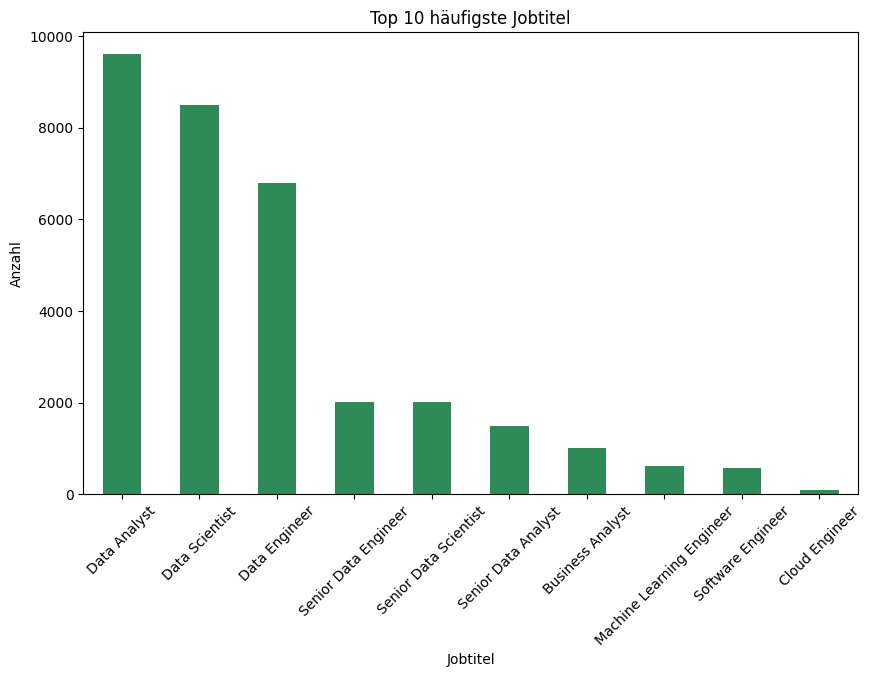

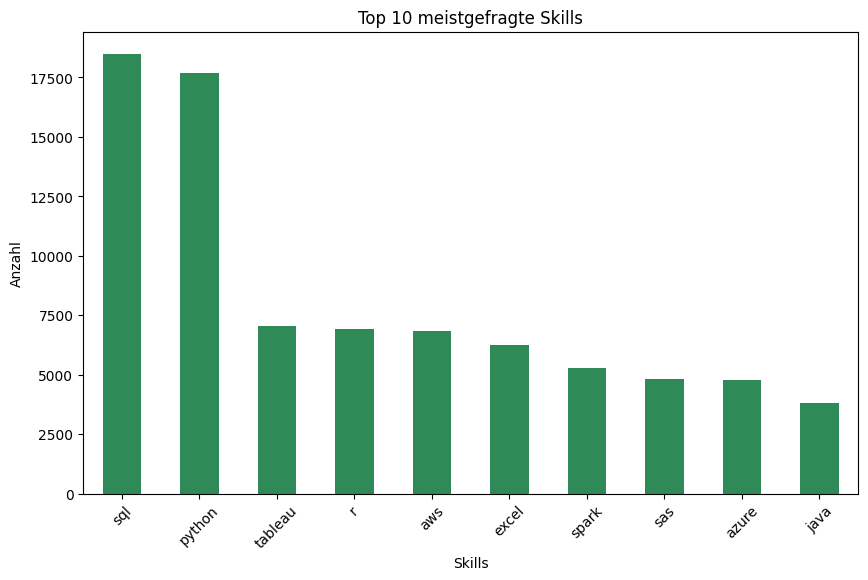

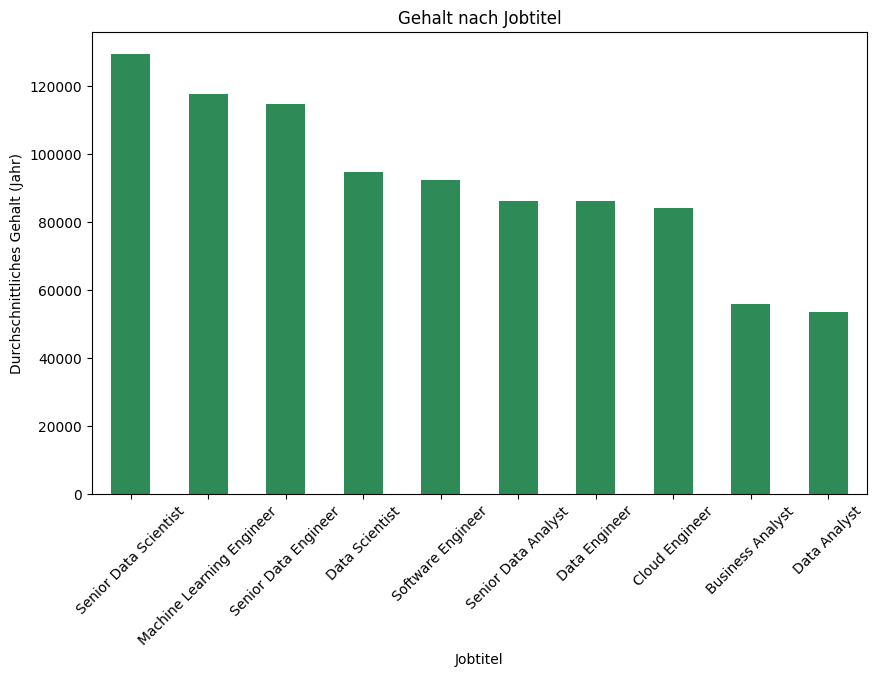

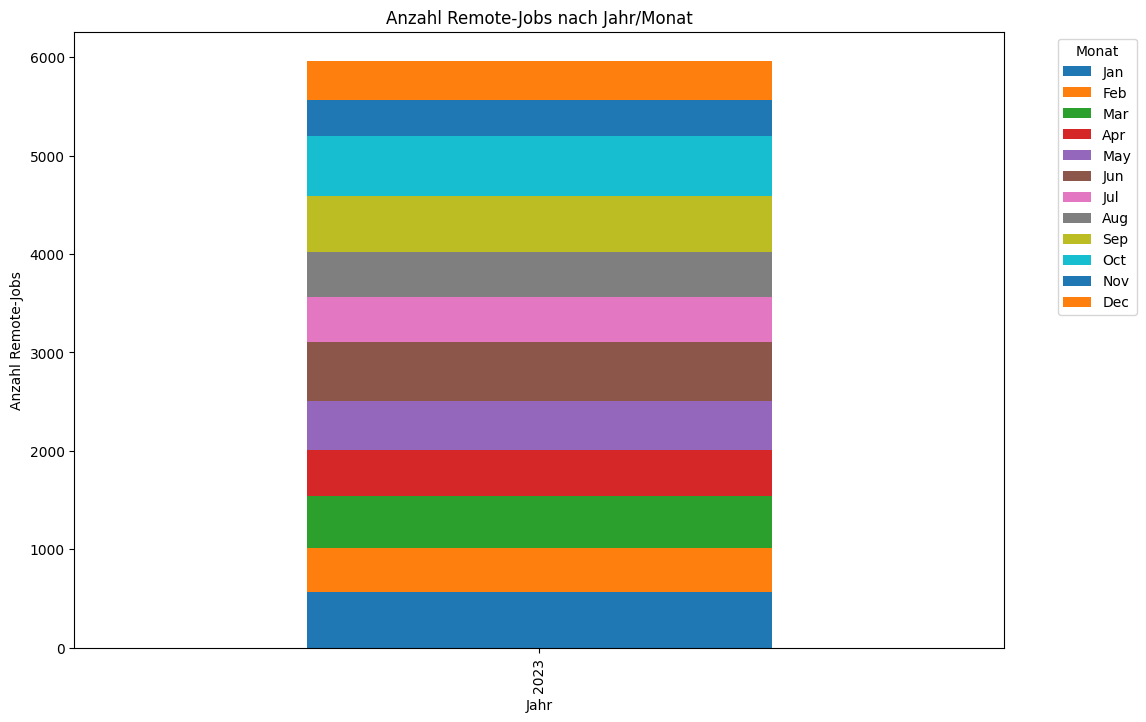

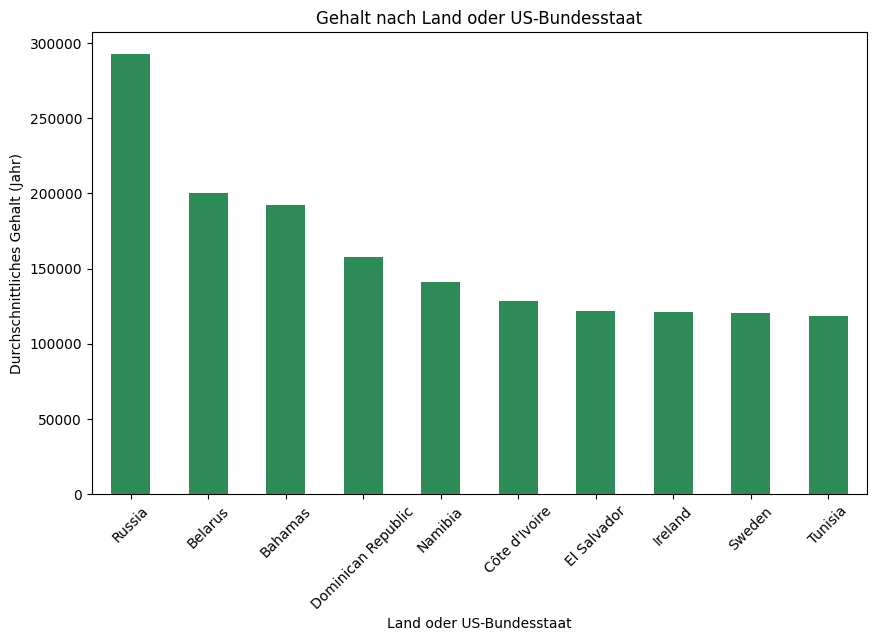

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter                                         #Die Counter-Klasse aus dem Modul collections in Python wird verwendet, um die Häufigkeit von Elementen in einer iterierbaren Sammlung zu zählen. 
                                                                        #Sie erstellt ein Wörterbuch, bei dem die Schlüssel die Elemente und die Werte deren Häufigkeiten sind.
# Top 10 häufigste Jobtitel
top_10_job_titles = job_data1["job_title_short"].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_job_titles.plot(kind='bar',color='seagreen')
plt.title('Top 10 häufigste Jobtitel')
plt.xlabel('Jobtitel')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.savefig('top_10_job_titles.png')
plt.show()

# Top 10 meistgefragte Skills
skills_list = job_data1['job_skills'].str.strip("[]").str.replace("'", "").str.split(", ")
all_skills = [skill for sublist in skills_list if isinstance(sublist, list) for skill in sublist]
top_10_skills = pd.Series(Counter(all_skills)).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_skills.plot(kind='bar',color='seagreen')
plt.title('Top 10 meistgefragte Skills')
plt.xlabel('Skills')
plt.ylabel('Anzahl')
plt.xticks(rotation=45)
plt.savefig('top_10_skills.png')
plt.show()

# Gehalt nach Jobtitel (Barplot)
avg_salary_by_job_title = job_data1.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_salary_by_job_title.plot(kind='bar',color='seagreen')
plt.title('Gehalt nach Jobtitel')
plt.xlabel('Jobtitel')
plt.ylabel('Durchschnittliches Gehalt (Jahr)')
plt.xticks(rotation=45)
plt.savefig('avg_salary_by_job_title.png')
plt.show()

# Anzahl Remote-Jobs nach Jahr/Monat
remote_jobs_by_month_year = job_data1[job_data1["is_remote"] == 1].groupby(['job_posted_year', 'job_posted_month']).size()
remote_jobs_by_month_year.unstack().plot(kind='bar', stacked=True, figsize=(12, 8),)
plt.title('Anzahl Remote-Jobs nach Jahr/Monat')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Remote-Jobs')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
handles, labels = plt.gca().get_legend_handles_labels()
labels = [month_names[int(label)-1] for label in labels]
plt.legend(handles, labels, title='Monat', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('remote_jobs_by_month_year.png')
plt.show()

# Gehalt nach Land oder US-Bundesstaat
avg_salary_by_country_state = job_data1.groupby("job_country")["salary_year_avg"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_salary_by_country_state.plot(kind='bar',color='seagreen')
plt.title('Gehalt nach Land oder US-Bundesstaat')
plt.xlabel('Land oder US-Bundesstaat')
plt.ylabel('Durchschnittliches Gehalt (Jahr)')
plt.xticks(rotation=45)
plt.savefig('avg_salary_by_country_state.png')
plt.show()



**Aufgabe 5: Zeitreihenanalyse**
- Wie hat sich die Anzahl an Jobpostings über Zeit entwickelt?
- Gibt es saisonale Muster?

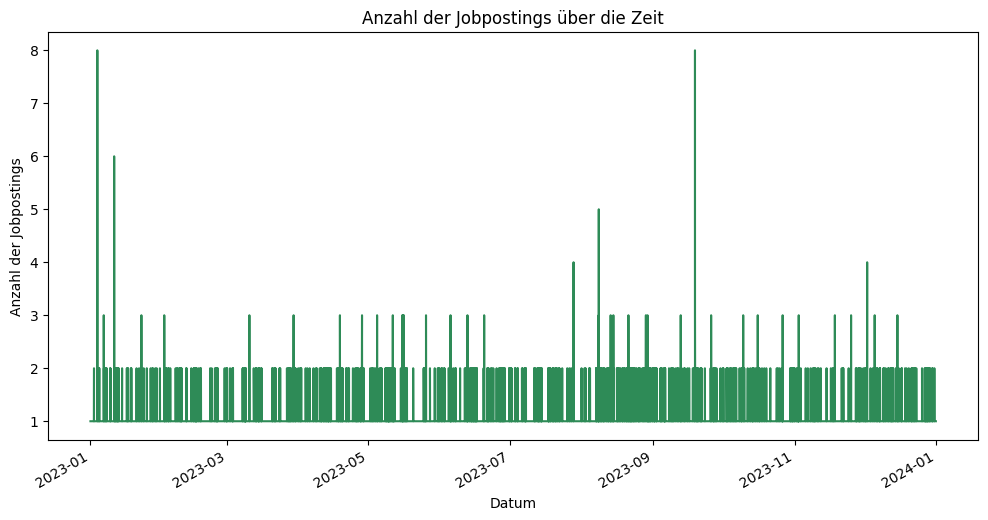

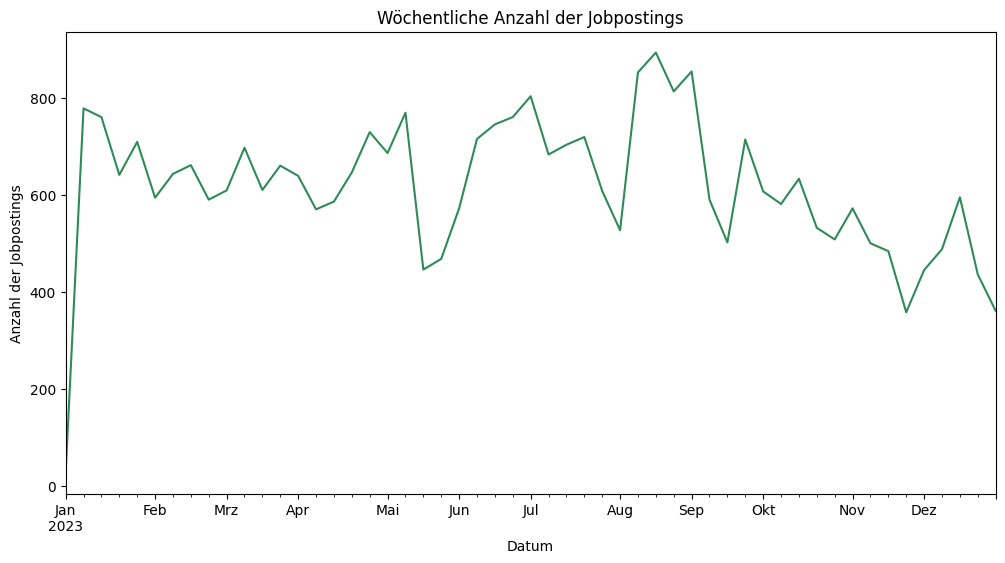

ValueError: x must have 2 complete cycles requires 104 observations. x only has 53 observation(s)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose         #seasonal_decompose ist eine Funktion, die eine Zeitreihe in drei Komponenten zerlegt:
                                                                #Trend: Der längerfristige Verlauf (z. B. ob die Werte allgemein steigen oder fallen).
                                                                #Saisonale Komponente: Regelmäßig wiederkehrende Muster (z. B. ein monatlicher oder jährlicher Zyklus).
                                                                #Rest / Residuum: Alles, was übrig bleibt (also Zufallsschwankungen oder Fehler).
from collections import Counter
import seaborn as sns

# Gruppieren Sie nach Datum und zählen Sie die Anzahl der Stellenausschreibungen
job_postings_over_time = job_data1.groupby('job_posted_date').size()

# Darstellung der Anzahl der Stellenausschreibungen im Zeitverlauf
plt.figure(figsize=(12, 6))
job_postings_over_time.plot(color='seagreen')
plt.title('Anzahl der Jobpostings über die Zeit')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Jobpostings')
plt.savefig('job_postings_over_time.png')
plt.show()

# Neuabtastung auf wöchentliche Frequenz und Darstellung
weekly_job_postings = job_postings_over_time.resample('W').sum()
plt.figure(figsize=(12, 6))
weekly_job_postings.plot(color='seagreen')
plt.title('Wöchentliche Anzahl der Jobpostings')
plt.xlabel('Datum'),
plt.ylabel('Anzahl der Jobpostings')
plt.savefig('weekly_job_postings.png')
plt.show()

# Zerlegen Sie die Zeitreihen, um saisonale Muster zu erkennen.
result = seasonal_decompose(weekly_job_postings, model='additive')
result.plot(color='seagreen')
plt.savefig('seasonal_decomposition.png')
plt.show()                                  ####Fehler tritt auf weil bei dem statsmodel.tsa.seasonal 24 Monate gebraucht werden um ein Saisonales muster ordentlich zu analysieren,dies ist bei daten für ein Jahr  nicht möglich.Wenn denn ist es es eine ungefähre abschätzung einer Saisonalität,da wir kein vergleich haben ###### 

Zur obrigen Aufgabe mit Fehler:####Fehler tritt auf weil bei dem statsmodel.tsa.seasonal 24 Monate gebraucht werden um ein Saisonales muster ordentlich zu analysieren,dies ist bei daten für ein Jahr  nicht möglich.Wenn denn ist es es eine ungefähre abschätzung einer Saisonalität,da wir kein vergleich haben ###### 


**Aufgabe 6: Vergleich Full-time vs. Part-time**
- Durchschnittsgehalt
- Anteil Remote
- Top Skills

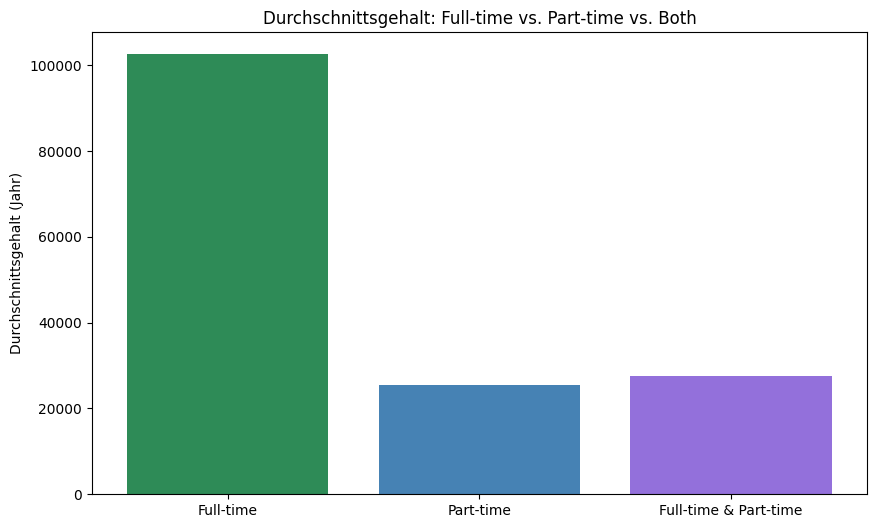

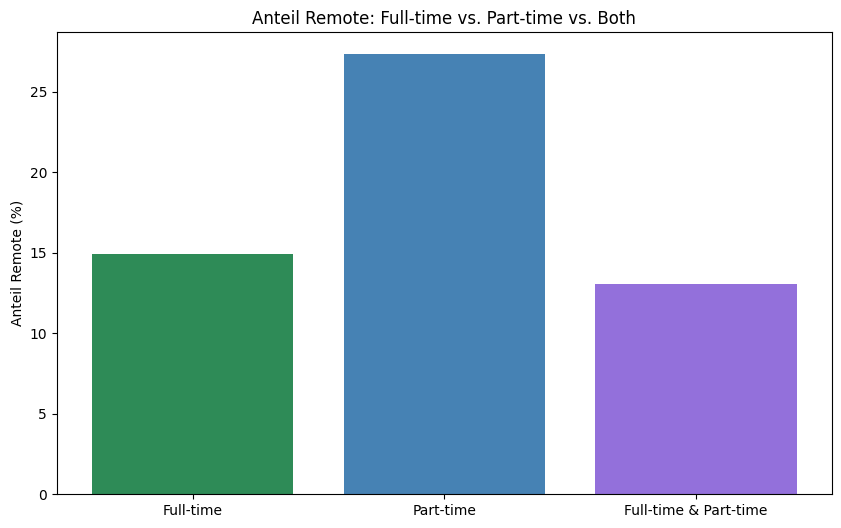

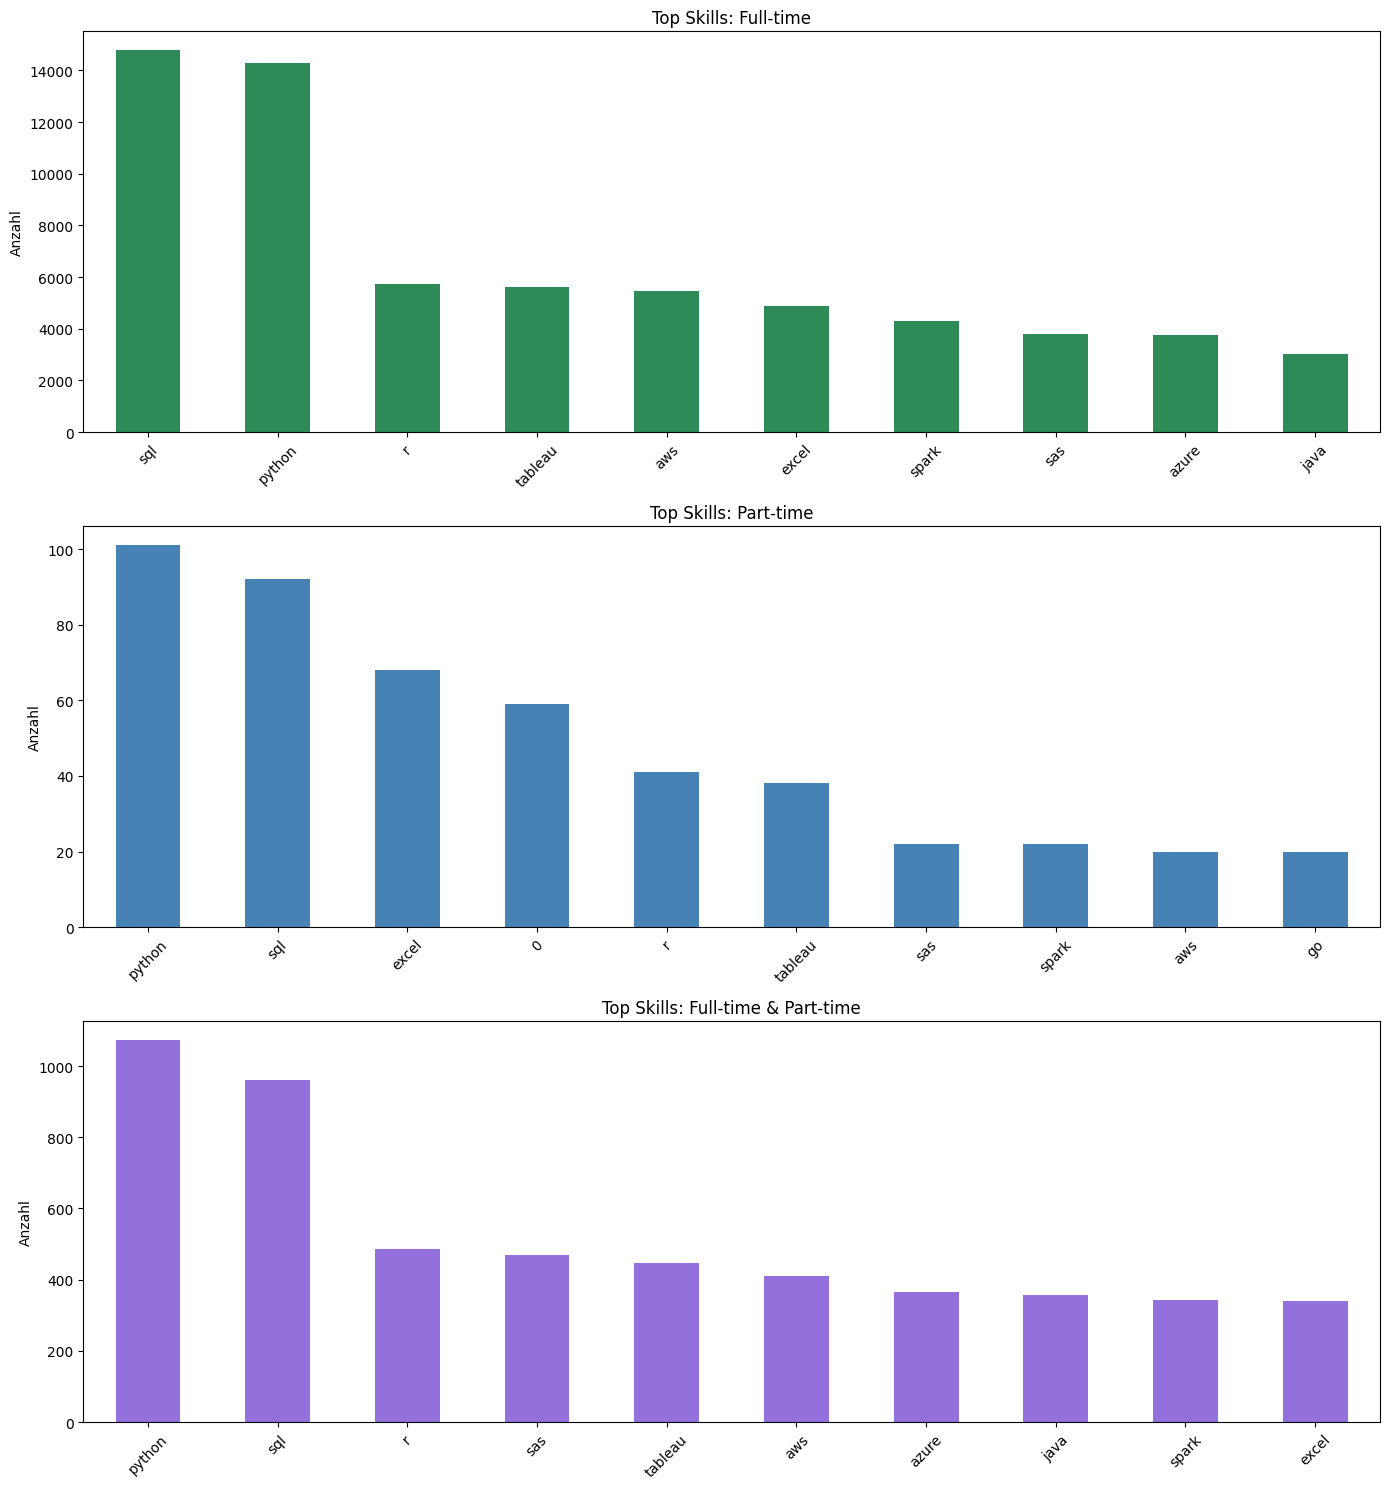

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Entfernen von Zeilen mit NaN in job_schedule_type
job_data1 = job_data1.dropna(subset=['job_schedule_type'])

# Aufteilung: Full-time, Part-time, und Full-time & Part-time
full_time_df = job_data1[
    job_data1['job_schedule_type'].str.contains('Full-time', na=False) &
    ~job_data1['job_schedule_type'].str.contains('Part-time', na=False)
]

part_time_df = job_data1[
    job_data1['job_schedule_type'].str.contains('Part-time', na=False) &
    ~job_data1['job_schedule_type'].str.contains('Full-time', na=False)
]

both_df = job_data1[
    job_data1['job_schedule_type'].str.contains('Full-time', na=False) &
    job_data1['job_schedule_type'].str.contains('Part-time', na=False)
]

# Durchschnittsgehalt berechnen
avg_salary_full_time = full_time_df['salary_year_avg'].mean()
avg_salary_part_time = part_time_df['salary_year_avg'].mean()
avg_salary_both = both_df['salary_year_avg'].mean()

# Remote-Anteil berechnen
remote_share_full_time = full_time_df['is_remote'].mean() * 100
remote_share_part_time = part_time_df['is_remote'].mean() * 100
remote_share_both = both_df['is_remote'].mean() * 100

# Funktion zur Extraktion der Top-Skills
def extract_top_skills(df):
    skills_list = df['job_skills'].dropna().astype(str).str.strip("[]").str.replace("'", "").str.split(", ")
    all_skills = []
    for sublist in skills_list:
        if isinstance(sublist, list):
            all_skills.extend(sublist)
    return pd.Series(Counter(all_skills)).sort_values(ascending=False).head(10)

# Top Skills für jede Kategorie
top_skills_full_time = extract_top_skills(full_time_df)
top_skills_part_time = extract_top_skills(part_time_df)
top_skills_both = extract_top_skills(both_df)

# Plot: Durchschnittsgehalt
plt.figure(figsize=(10, 6))
plt.bar(['Full-time', 'Part-time', 'Full-time & Part-time'],
        [avg_salary_full_time, avg_salary_part_time, avg_salary_both],
        color=['seagreen', 'steelblue', 'mediumpurple'])
plt.title('Durchschnittsgehalt: Full-time vs. Part-time vs. Both')
plt.ylabel('Durchschnittsgehalt (Jahr)')
plt.savefig('avg_salary_comparison.png')
plt.show()

# Plot: Remote-Anteil
plt.figure(figsize=(10, 6))
plt.bar(['Full-time', 'Part-time', 'Full-time & Part-time'],
        [remote_share_full_time, remote_share_part_time, remote_share_both],
        color=['seagreen', 'steelblue', 'mediumpurple'])
plt.title('Anteil Remote: Full-time vs. Part-time vs. Both')
plt.ylabel('Anteil Remote (%)')
plt.savefig('remote_share_comparison.png')
plt.show()

# Plot: Top Skills Vergleich
fig, ax = plt.subplots(3, 1, figsize=(14, 15))

top_skills_full_time.plot(kind='bar', ax=ax[0], color='seagreen')
ax[0].set_title('Top Skills: Full-time')
ax[0].set_ylabel('Anzahl')
ax[0].set_xticklabels(top_skills_full_time.index, rotation=45)

top_skills_part_time.plot(kind='bar', ax=ax[1], color='steelblue')
ax[1].set_title('Top Skills: Part-time')
ax[1].set_ylabel('Anzahl')
ax[1].set_xticklabels(top_skills_part_time.index, rotation=45)

top_skills_both.plot(kind='bar', ax=ax[2], color='mediumpurple')
ax[2].set_title('Top Skills: Full-time & Part-time')
ax[2].set_ylabel('Anzahl')
ax[2].set_xticklabels(top_skills_both.index, rotation=45)

plt.tight_layout()
plt.savefig('top_skills_comparison.png')
plt.show()


**Aufgabe 7: Gehaltstrends**
- Welche Jobtitel haben den höchsten Jahresdurchschnitt?
- Welche Skills sind mit hohen Gehältern verbunden?
- Wie unterscheiden sich salary_hour_avg und salary_year_avg?

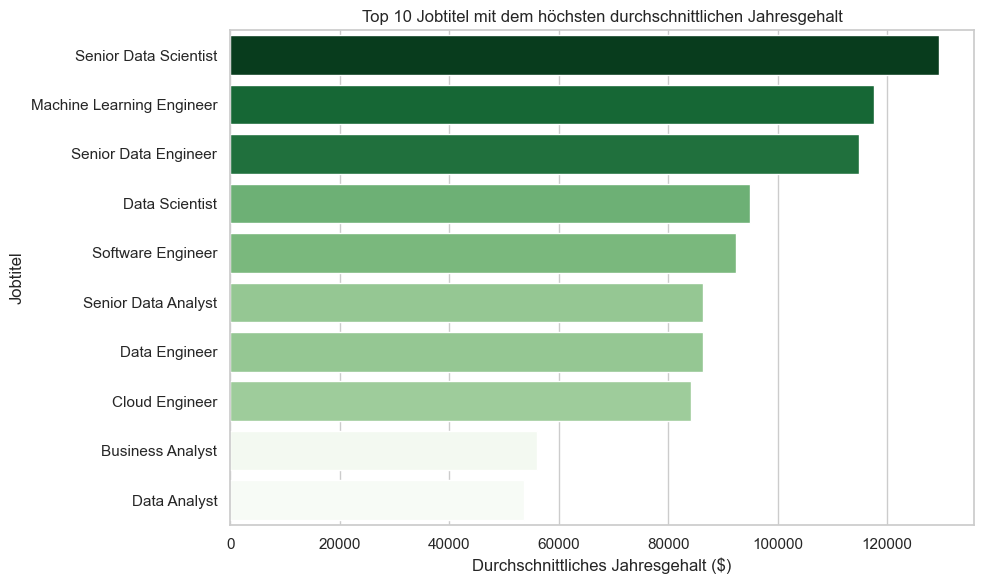

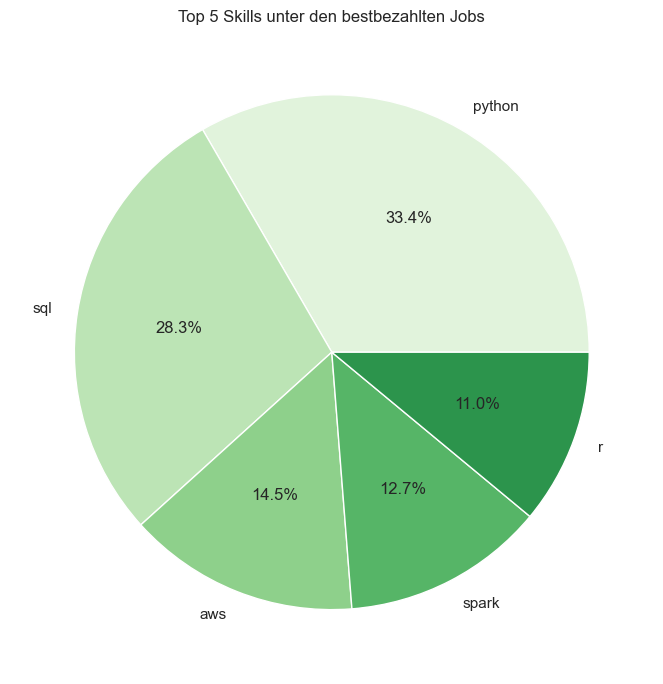

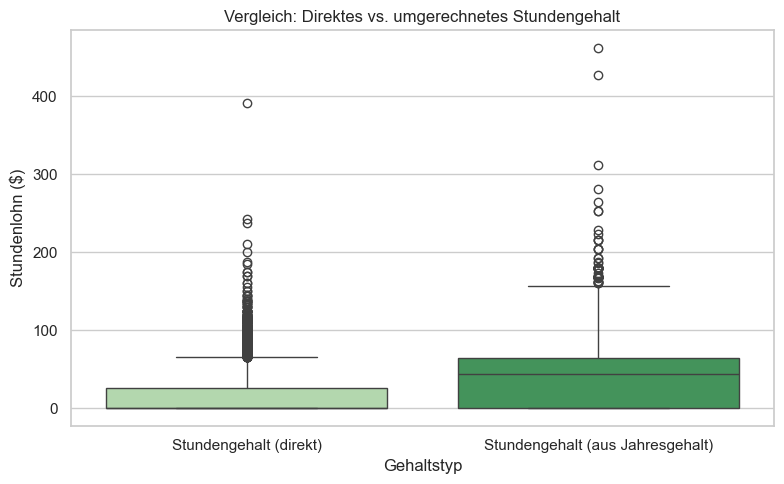

(             job_title_short  salary_year_avg
 8      Senior Data Scientist    129394.939122
 5  Machine Learning Engineer    117539.462158
 7       Senior Data Engineer    114848.136839
 4             Data Scientist     94861.921197
 9          Software Engineer     92344.914390
 6        Senior Data Analyst     86363.755259
 3              Data Engineer     86335.009802
 1             Cloud Engineer     84098.250000
 0           Business Analyst     55951.092735
 2               Data Analyst     53573.799066,
     Skill  Anzahl
 0  python    5868
 1     sql    4982
 2     aws    2558
 3   spark    2240
 4       r    1937,
        Stundengehalt (direkt)  Stundengehalt (aus Jahresgehalt)
 count            32672.000000                      32672.000000
 mean                15.309694                         39.946282
 std                 25.317955                         33.659740
 min                  0.000000                          0.000000
 25%                  0.000000            

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast
import warnings

# Warnungen unterdrücken (z. B. FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Stil für Visualisierung
sns.set(style="whitegrid", palette="Greens")

# ---------------------------
# 1. Top 10 Jobtitel mit höchstem Jahresgehalt
# ---------------------------
top_titles_df = (
    job_data1[['job_title_short', 'salary_year_avg']]
    .dropna()
    .groupby('job_title_short', as_index=False)
    .mean()
    .sort_values(by='salary_year_avg', ascending=False)
    .head(10)
)

# Visualisierung: Balkendiagramm
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_titles_df,
    y='job_title_short',
    x='salary_year_avg',
    hue='salary_year_avg',
    dodge=False,
    palette="Greens",
    legend=False
)
plt.title("Top 10 Jobtitel mit dem höchsten durchschnittlichen Jahresgehalt")
plt.xlabel("Durchschnittliches Jahresgehalt ($)")
plt.ylabel("Jobtitel")
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Top 5 gefragte Skills unter den Top 25% Gehältern
# ---------------------------
skills_df = job_data1[['salary_year_avg', 'job_skills']].dropna()
threshold = skills_df['salary_year_avg'].quantile(0.75)
top_salary_skills = skills_df[skills_df['salary_year_avg'] >= threshold]

# Funktion für sicheres Parsen
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return []

# Skills extrahieren und zählen
all_skills = top_salary_skills['job_skills'].apply(safe_literal_eval).explode()
skill_counts = Counter(all_skills.dropna())
top_skills = skill_counts.most_common(5)

# In DataFrame für Plot umwandeln
top_skills_df = pd.DataFrame(top_skills, columns=["Skill", "Anzahl"])

# Visualisierung: Tortendiagramm
plt.figure(figsize=(7, 7))
plt.pie(top_skills_df['Anzahl'], labels=top_skills_df['Skill'], autopct='%1.1f%%', colors=sns.color_palette("Greens"))
plt.title("Top 5 Skills unter den bestbezahlten Jobs")
plt.tight_layout()
plt.show()

# ---------------------------
# 3. Vergleich von Jahres- und Stundengehalt (Boxplot)
# ---------------------------
# Neue Spalte: umgerechneter Stundenlohn aus Jahresgehalt
job_data1['salary_year_avg_on_hour'] = job_data1['salary_year_avg'] / (260 * 8)

# Vergleichsdaten bereinigen
salary_comparison_df = job_data1[['salary_hour_avg', 'salary_year_avg_on_hour']].dropna()

# Umbenennen für Klarheit
salary_comparison_df = salary_comparison_df.rename(columns={
    'salary_hour_avg': 'Stundengehalt (direkt)',
    'salary_year_avg_on_hour': 'Stundengehalt (aus Jahresgehalt)'
})

# Long-Format für Seaborn
df_long = salary_comparison_df.melt(var_name="Gehaltstyp", value_name="Stundenlohn ($)")

# Visualisierung: Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_long, x="Gehaltstyp", y="Stundenlohn ($)", palette="Greens")
plt.title("Vergleich: Direktes vs. umgerechnetes Stundengehalt")
plt.ylabel("Stundenlohn ($)")
plt.xlabel("Gehaltstyp")
plt.tight_layout()
plt.show()

# ---------------------------
# Rückgabe der Kerndaten (optional anzeigen in Notebook)
# ---------------------------
top_titles_df, top_skills_df, salary_comparison_df.describe()


**Aufgabe 8: Länder-/Standortvergleich**
- Vergleiche Gehaltsniveaus zwischen USA, Sudan, etc.
- Durchschnittliche Gehälter nach Bundesstaat (z. B. extrahiert aus job_location)

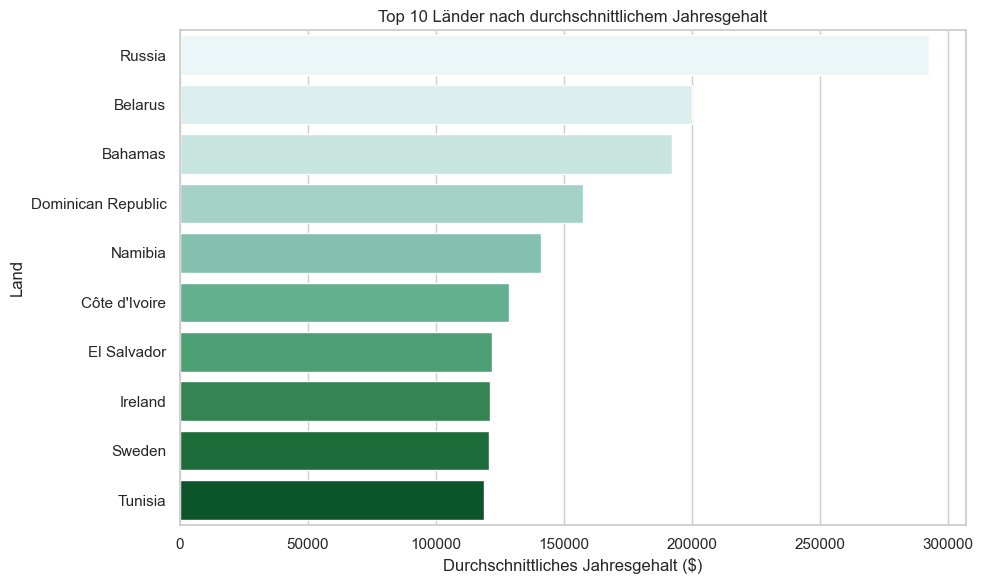

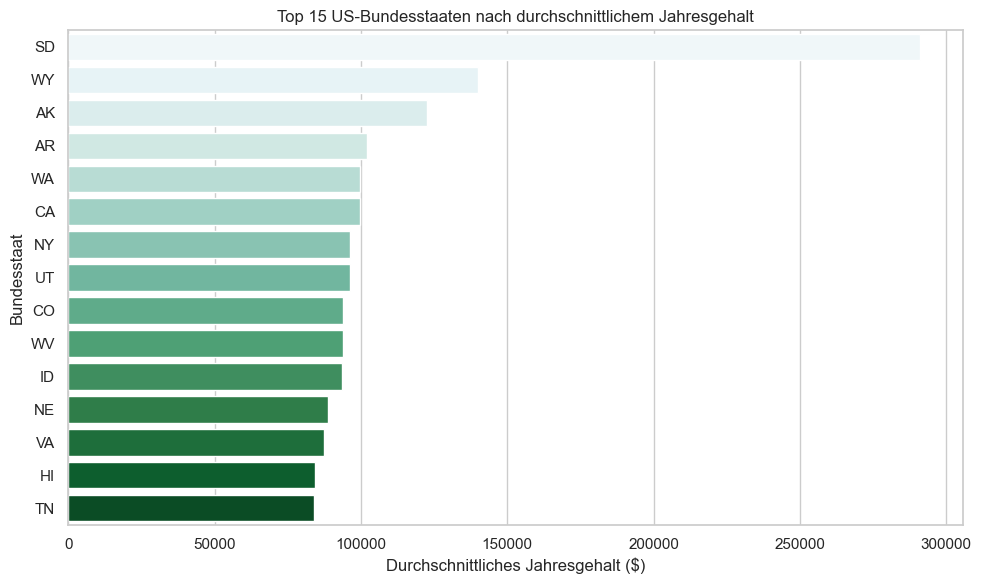

In [18]:


# Stil setzen
sns.light_palette("seagreen", as_cmap=True)

# ---------------------------
# 1. Durchschnittliches Jahresgehalt pro Land
# ---------------------------
country_salary_comparison = (
    job_data1.groupby("job_country")["salary_year_avg"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
)

# Visualisierung: Top 10 Länder nach Gehalt
plt.figure(figsize=(10, 6))
sns.barplot(x=country_salary_comparison.head(10).values,
            y=country_salary_comparison.head(10).index,
            palette="BuGn")
plt.title("Top 10 Länder nach durchschnittlichem Jahresgehalt")
plt.xlabel("Durchschnittliches Jahresgehalt ($)")
plt.ylabel("Land")
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Durchschnittliches Jahresgehalt nach US-Bundesstaat
# ---------------------------
us_jobs = job_data1[job_data1["job_country"] == "United States"].copy()

# Bundesstaat aus job_location extrahieren
us_jobs["state"] = us_jobs["job_location"].str.extract(r',\s*([A-Z]{2})$')

# Durchschnittliches Gehalt pro Bundesstaat
state_salary_comparison = (
    us_jobs.groupby("state")["salary_year_avg"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
)

# Visualisierung: Top 15 US-Bundesstaaten nach Gehalt
plt.figure(figsize=(10, 6))
sns.barplot(x=state_salary_comparison.head(15).values,
            y=state_salary_comparison.head(15).index,
            palette="BuGn")
plt.title("Top 15 US-Bundesstaaten nach durchschnittlichem Jahresgehalt")
plt.xlabel("Durchschnittliches Jahresgehalt ($)")
plt.ylabel("Bundesstaat")
plt.tight_layout()
plt.show()



**Aufgabe 9: Text-Parsing und Feature Engineering**
- Zähle Vorkommen einzelner Skills
- Cluster ähnliche Rollen (z. B. alle mit "Data Scientist")
- Extrahiere State aus US-Adressen

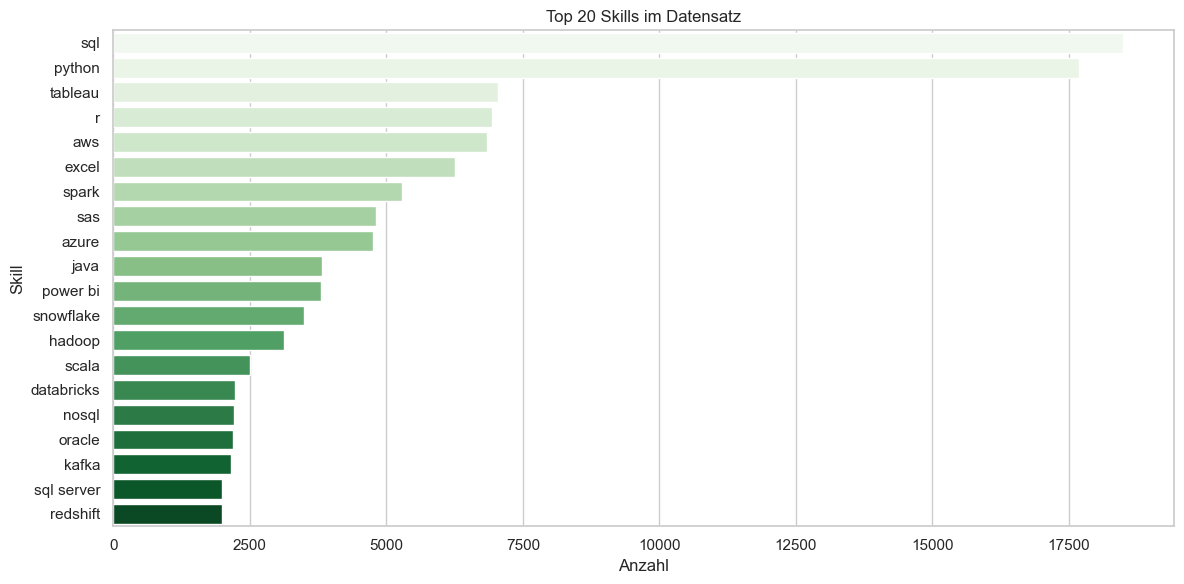

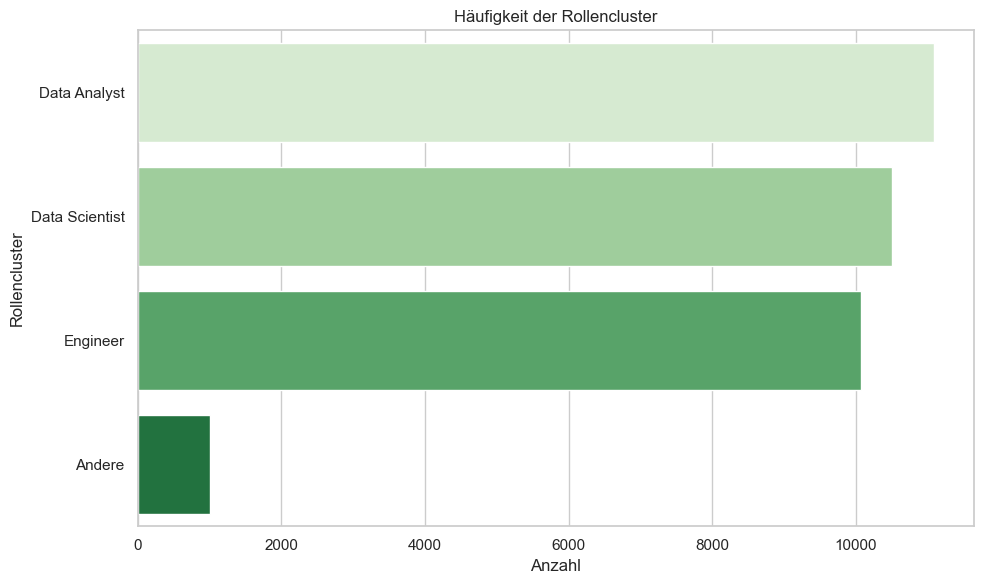

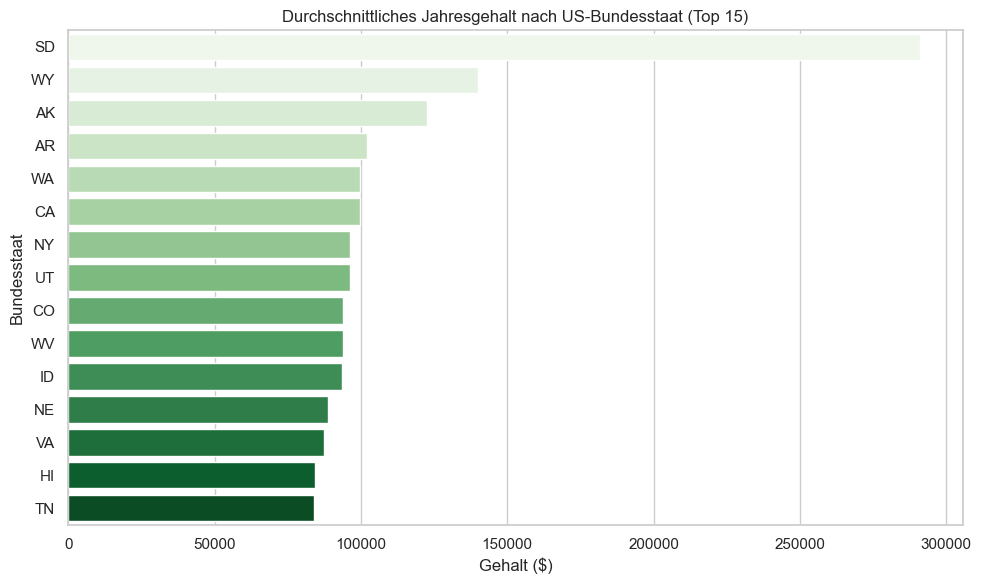

In [19]:
# Nur Zeilen mit vorhandenen Skill-Daten
skills_series = job_data1["job_skills"].dropna()

# Skills extrahieren und zählen
all_skills = []
for entry in skills_series:
    try:
        skills_list = ast.literal_eval(entry)
        all_skills.extend(skills_list)
    except:
        continue

# Häufigkeit zählen
skill_counts = Counter(all_skills)
top_skills_df = pd.DataFrame(skill_counts.most_common(20), columns=["Skill", "Anzahl"])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_skills_df, x="Anzahl", y="Skill", palette="Greens")
plt.title("Top 20 Skills im Datensatz")
plt.tight_layout()
plt.show()

import numpy as np
# Kopie der Spalte für neue Cluster
job_data1['role_cluster'] = np.nan

# Beispielhafte Rollen-Clustering (du kannst hier erweitern!)
job_data1.loc[job_data1['job_title_short'].str.contains("Data Scientist", case=False, na=False), 'role_cluster'] = "Data Scientist"
job_data1.loc[job_data1['job_title_short'].str.contains("Data Analyst", case=False, na=False), 'role_cluster'] = "Data Analyst"
job_data1.loc[job_data1['job_title_short'].str.contains("Engineer", case=False, na=False), 'role_cluster'] = "Engineer"
job_data1.loc[job_data1['job_title_short'].str.contains("Developer", case=False, na=False), 'role_cluster'] = "Developer"
job_data1.loc[job_data1['job_title_short'].str.contains("Manager", case=False, na=False), 'role_cluster'] = "Manager"
job_data1['role_cluster'] = job_data1['role_cluster'].fillna("Andere")

# Übersicht der Verteilung
role_counts = job_data1['role_cluster'].value_counts().reset_index()
role_counts.columns = ['Rollencluster', 'Anzahl']

# Visualisierung
plt.figure(figsize=(10, 6))
sns.barplot(data=role_counts, y='Rollencluster', x='Anzahl', palette="Greens")
plt.title("Häufigkeit der Rollencluster")
plt.tight_layout()
plt.show()

# Nur US-Daten
us_jobs = job_data1[job_data1["job_country"] == "United States"].copy()

# Extrahiere die letzten zwei Großbuchstaben nach Komma
us_jobs["state"] = us_jobs["job_location"].str.extract(r",\s*([A-Z]{2})$")

# Durchschnittliches Gehalt je Bundesstaat (optional)
state_salary = (
    us_jobs.groupby("state")["salary_year_avg"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualisierung
plt.figure(figsize=(10, 6))
sns.barplot(data=state_salary.head(15), x='salary_year_avg', y='state', palette="Greens")
plt.title("Durchschnittliches Jahresgehalt nach US-Bundesstaat (Top 15)")
plt.xlabel("Gehalt ($)")
plt.ylabel("Bundesstaat")
plt.tight_layout()
plt.show()






**Aufgabe 10: Interaktive Visualisierung (optional)**
- Verwende plotly oder Dash für interaktive Charts (falls du erweitern willst)

In [20]:
import plotly.express as px
# Skills vorbereiten
skills_series = job_data1["job_skills"].dropna()
all_skills = []
for entry in skills_series:
    try:
        skills_list = ast.literal_eval(entry)
        all_skills.extend(skills_list)
    except:
        continue

# Top 20 Skills
skill_counts = Counter(all_skills)
top_skills_df = pd.DataFrame(skill_counts.most_common(20), columns=["Skill", "Anzahl"])

# Interaktive Plotly-Visualisierung
fig = px.bar(top_skills_df, x='Anzahl', y='Skill', orientation='h',
             title='Top 20 Skills (interaktiv)',
             color='Anzahl', color_continuous_scale='BuGn')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

country_salary = (
    job_data1.groupby("job_country")["salary_year_avg"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
    .reset_index()
)

fig = px.bar(country_salary.head(15),
             x='salary_year_avg',
             y='job_country',
             orientation='h',
             title='Top 15 Länder nach durchschnittlichem Jahresgehalt',
             labels={'salary_year_avg': 'Gehalt ($)', 'job_country': 'Land'},
             color='salary_year_avg', color_continuous_scale='BuGn')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# US Jobs vorbereiten
us_jobs = job_data1[job_data1["job_country"] == "United States"].copy()
us_jobs["state"] = us_jobs["job_location"].str.extract(r",\s*([A-Z]{2})$")

state_salary = us_jobs.groupby("state")["salary_year_avg"].mean().dropna().reset_index()

# Plotly Choropleth (USA Map)
fig = px.choropleth(state_salary,
                    locations='state',
                    locationmode="USA-states",
                    color='salary_year_avg',
                    scope="usa",
                    title="Durchschnittliches Jahresgehalt nach US-Bundesstaat",
                    color_continuous_scale="BuGn",
                    labels={'salary_year_avg': 'Gehalt ($)'})
fig.show()


### Bonusideen für Extra-Punkte

- Heatmap der Gehälter auf einer US-Karte
- Skill Co-Occurrence Matrix: Welche Skills tauchen oft gemeinsam auf?
- Jobmarkt-Index: Definiere eine eigene Kennzahl für „Attraktivität“ eines Jobs

Anzahl Skill-Paare gefunden: 10565


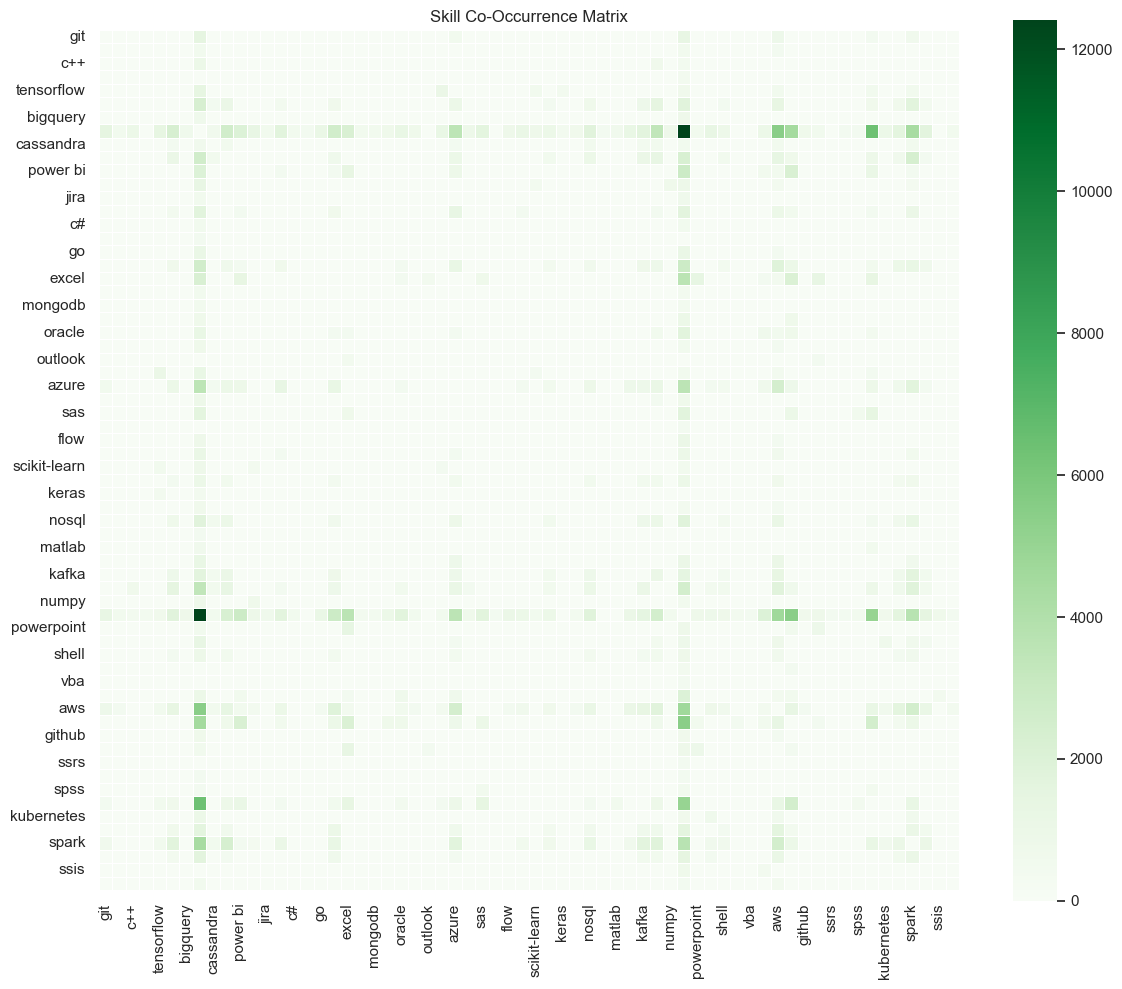

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from itertools import combinations
import plotly.express as px

# Funktion zum robusten Parsen von Skills
def parse_skills(entry):
    try:
        parsed = ast.literal_eval(entry)
        if isinstance(parsed, list):
            return [s.strip() for s in parsed]
        elif isinstance(parsed, str):
            return [s.strip() for s in parsed.split(',')]
        else:
            return []
    except:
        return [s.strip() for s in str(entry).split(',')]

# Skill-Co-Occurrence zählen
co_occurrence = Counter()

for entry in job_data1["job_skills"].dropna():
    skills = list(set(parse_skills(entry)))
    if len(skills) > 1:
        for combo in combinations(sorted(skills), 2):
            co_occurrence[combo] += 1

print(f"Anzahl Skill-Paare gefunden: {len(co_occurrence)}")

# Matrix aufbauen für Top 300 Paare
top_pairs = dict(co_occurrence.most_common(300))
unique_skills = list({s for pair in top_pairs for s in pair})
skill_df = pd.DataFrame(0, index=unique_skills, columns=unique_skills)

for (s1, s2), count in top_pairs.items():
    skill_df.loc[s1, s2] = count
    skill_df.loc[s2, s1] = count  # symmetrisch

# Heatmap anzeigen – nur wenn Matrix nicht leer
if skill_df.empty or (skill_df.sum().sum() == 0):
    print("Keine Skill-Kombinationen vorhanden oder alle Counts = 0.")
else:
    plt.figure(figsize=(12, 10))
    sns.heatmap(skill_df, cmap="Greens", linewidths=.5, square=True)
    plt.title("Skill Co-Occurrence Matrix")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


import plotly.graph_objects as go

# Top 20 häufigste Skill-Paare extrahieren
top_n = 20
top_pairs = co_occurrence.most_common(top_n)
skills = list({s for pair, _ in top_pairs for s in pair})

# Skill-Index-Zuordnung
skill_to_idx = {skill: i for i, skill in enumerate(skills)}

# Links für das Chord-Diagramm vorbereiten
sources = [skill_to_idx[s1] for (s1, s2), _ in top_pairs]
targets = [skill_to_idx[s2] for (s1, s2), _ in top_pairs]
values = [count for _, count in top_pairs]

# Plotly Sankey-Diagramm als Chord-Ersatz                       #Jede Verbindung steht für eine häufige Kombination                                
                                                                #Du kannst mit der Maus über Skills und Verbindungen hovern
                                                                #Stärke der Linie = Häufigkeit


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=skills,
        color="darkseagreen"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="darkseagreen"
    )
)])

fig.update_layout(title_text="Chord-Style Diagramm: Top Skill-Kombinationen", font_size=12)
fig.show()
